1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

## Análisis de regresión linear multinominal
target = "duracion"

### Importamos librerias

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns 

### Cargamos el dataframe

In [20]:
dataframe = pd.read_csv("/Users/Elsa/Desktop/The_Bridge/data_science_jun_2020/week8/day3/data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [22]:
X = dataframe[["paginas", "acciones", "valor", "clase"]]
y = dataframe["duracion"]

### Entrenamos el modelo
Como no me especifican el porcentaje de entrenamiento, aplico un 80-20 %

Dividimos el conjunto de entrenamiento y conjunto de test:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Aplicamos la funcion de linearRegression:

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)  

Entrenamos el modelo:

In [25]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

### Evaluación del modelo

In [26]:
print(lm.intercept_)

2.8127098603579412


Calculamos su coeficiente:

In [27]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['duracion'])
coeff_df

,duracion
paginas,56.749670
acciones,-1.432839
valor,-0.496296
clase,32.021790


### Predecimos el modelo

In [28]:
predictions = lm.predict(X_test)

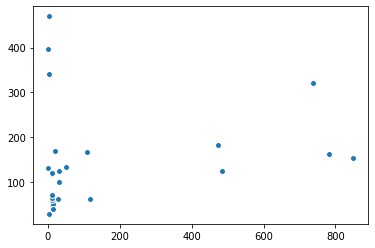

In [29]:
plt.scatter(y_test, predictions, edgecolor='white')

### Respondemos a las preguntas

¿Qué acierto tiene? (score)

In [32]:
print("El conjunto de entrenamiento tiene un ", lm.score(X_train,y_train)*100, " %")
print("El conjunto de test tiene un ", lm.score(X_test,y_test)*100, " %")

El conjunto de entrenamiento tiene un  11.822945926275086  %
El conjunto de test tiene un  0.6761052940610912  %


¿Cuál es el RMSE? ¿Dirías que es un valor alto?

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 158.38316344920457
MSE: 55992.83722550592
RMSE: 236.62805671666646


In [ ]:
Considero que el error es alto porque hablamos de duración, de tiempo.

Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?

In [35]:
dataframe.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


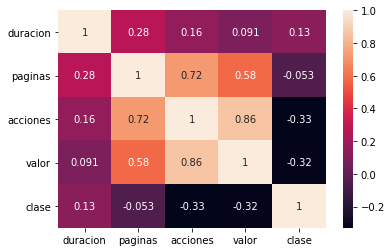

In [40]:
sns.heatmap(dataframe.corr(), annot=True)

In [ ]:
Tiene coherencia que el tiempo, la duración no tenga una correlación con los otros parámetros o variables.

¿Es la regresión un buen método para este dataset?

In [ ]:
No es un buen método por el porcentaje de score, de aciertos que da el modelo, es muy bajo.